# Analiza receptov

In [238]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

recepti = pd.read_csv('recepti.csv')
recepti['cas_priprave'] = recepti['cas_priprave'].astype('Int64')
recepti['cas_kuhanja'] = recepti['cas_kuhanja'].astype('Int64')
recepti['skupni_cas'] = recepti['skupni_cas'].astype('Int64')

## Pregled podatkov

V datoteki recepti.csv so shranjeni podatki o imenu, oznaki, težavnosti, avtorju, številu sestavin, času priprave, času kuhanja, skupnem času, dolžini navodil, energijski vrednosti na 100 g ter energijski vrednosti porcije posamezne jedi. Shranjenih je 6733 različnih receptov. Prvih 10 je prikazanih v tabeli.

In [239]:
recepti.head(10)

,ime,oznaka,tezavnost,avtor,stevilo_sestavin,cas_priprave,cas_kuhanja,skupni_cas,dolzina_navodil,energija_100g,energija_porcija
0,Solata s fižolom in bučkami,Piknik in žar,1,Su. S.,12,15,<NA>,15,725,152.37,441.50
1,Bananin kolaček v skodelici,Na hitro,1,M. J.,9,2,2,4,789,179.91,488.00
2,Zelenjavna lazanja,Kaj skuhati,1,Sanja Sirk,15,30,65,95,2317,265.92,628.33
3,Burek z bučkami,Brez mesa,2,Klara Peterlin,9,60,40,100,1254,256.50,636.25
4,Hitri piščančji tacosi,Meso,1,Su. S.,16,20,20,40,788,199.34,376.25
5,Piščanec s parmezanom,Meso,1,Su. S.,14,20,30,50,1015,214.58,566.75
6,Bučkini polpeti v pečici,Zelenjava,1,M. H. J.,5,45,35,80,834,118.29,242.50
7,Ledene kocke s sadjem,Sladice,1,Su. S.,18,60,45,105,1474,313.79,361.42
8,Jogurtove rezine s sadjem in piškoti (brez peke),Sladice,1,Sanja Sirk,10,30,15,45,1531,143.50,89.67
9,Krompirjeva poletna solata,Piknik in žar,1,Su. S.,11,15,35,50,1045,79.09,255.25


V naslednji tabeli so prikazani osnovni statistični podatki glede na kategorijo. Razberemo lahko število navedenih podatkov v CSV, povprečno vrednost, standardni odklon, minimalno ter maksimalno vrednost podatkov, prvi kvartil, mediano in tretji kvartil. Tako lahko na primer vidimo, da so najkrajša navodila dolga le 156 znakov, energijska vrednost porcije jedi pa je v povprečju 464.4 kcal.

In [240]:
recepti.describe()

,tezavnost,stevilo_sestavin,cas_priprave,cas_kuhanja,skupni_cas,dolzina_navodil,energija_100g,energija_porcija
count,6733.000000,6733.000000,6703.0,6005.0,6729.0,6733.000000,6638.000000,6635.000000
mean,1.392099,10.033269,32.538565,33.593505,62.391886,1169.809297,212.081835,464.430963
std,0.541622,4.378493,50.950374,32.227923,59.460125,468.215002,118.655244,3026.124463
min,1.000000,1.000000,1.0,1.0,2.0,156.000000,1.490000,0.200000
25%,1.000000,7.000000,10.0,15.0,30.0,837.000000,121.235000,220.250000
50%,1.000000,10.000000,15.0,25.0,45.0,1124.000000,188.965000,360.000000
75%,2.000000,12.000000,30.0,40.0,73.0,1441.000000,285.547500,521.500000
max,3.000000,62.000000,760.0,480.0,920.0,3829.000000,883.330000,240196.750000


## Analiza in grafična predstavitev podatkov

Recepti so označeni s težavnostjo od 1 do 3, kjer 1 pomeni, da je recept enostavno pripraviti, 3 pa označuje težje recepte. Tortni grafikon prikazuje delež receptov posamezne težavnosti. Opazimo, da je na spletni strani okusno.je največ lahkih receptov (63.5 %), sledijo jim srednje težki recepti (33.7 %), najmanj pa je zelo zahtevnih receptov (2.7 %).

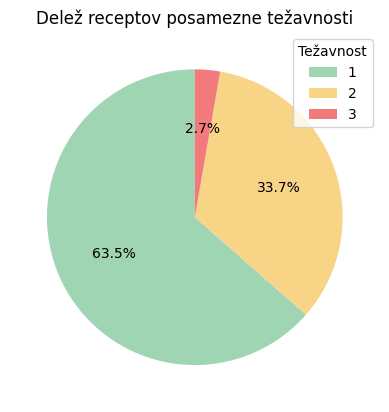

In [241]:
tezavnost = recepti['tezavnost'].value_counts()
stevilo_tezavnosti = dict(tezavnost)
stevilke_tezavnost = stevilo_tezavnosti.keys()
stevilo_receptov_tezavnost = stevilo_tezavnosti.values()
plt.pie(stevilo_receptov_tezavnost, colors=['#9fd5b2', '#f7d486', '#f27a7d'], startangle=90, autopct='%1.1f%%')
plt.title('Delež receptov posamezne težavnosti')
plt.legend(title='Težavnost', labels=stevilke_tezavnost, loc='upper right')
plt.show()

Receptom so dodeljene tudi različne oznake, kot na primer 'Azijska', 'Glavne jedi' in 'Pecivo'. Deset kategorij z največjim številom receptov je prikazanih v naslednjem stolpičnem grafu. Sem torej spadajo kategorije, v katere je uvrščenih več kot 200 receptov.

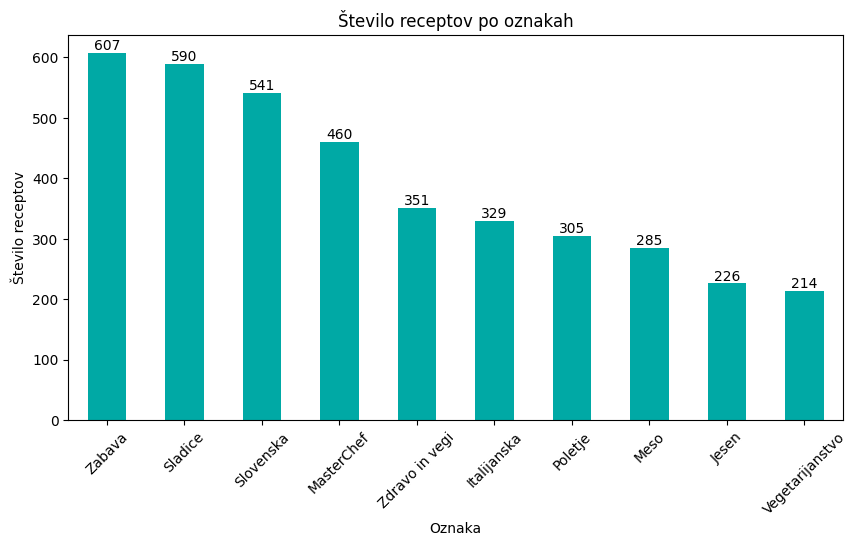

In [242]:
for oznaka in recepti['oznaka'].unique():
    recepti.groupby('oznaka')['ime'].count().sort_values(ascending=False).head(10).plot.bar(color='#00a9a5', figsize=(10, 5))
plt.title('Število receptov po oznakah')
plt.xlabel('Oznaka')
plt.ylabel('Število receptov')
plt.xticks(rotation=45)
for i in range(len(recepti.groupby('oznaka')['ime'].count().sort_values(ascending=False).head(10))):
    plt.text(i, recepti.groupby('oznaka')['ime'].count().sort_values(ascending=False).head(10).values[i] + 0.5, 
             str(recepti.groupby('oznaka')['ime'].count().sort_values(ascending=False).head(10).values[i]), 
             ha='center', va='bottom')
plt.show()

Naslednji trije grafi obravnavajo energijsko vrednost in čas kuhanja jedi glede na vrsto obroka (zajtrk, kosilo, večerja). 

Prvi natančneje prikazuje energijsko vrednost porcije obroka. Opazimo, da ima večina zajtrkov nižjo kalorično vrednost kot ostala dva obroka. Vrednosti za vse tri obroke se večinoma skladajo s priporočili, da zajtrk vsebuje 300-500 kcal, kosilo in večerja pa vsak 500-700 kcal. Vseeno lahko iz grafa razberemo, da je najmanj razlik med podatki za večerjo, kjer se prvi in tretji kvartil skoraj prekrivata z minimalno in maksimalno vrednostjo (razen pri eni točki, ki konkretno odstopa od ostalih podaktov). Po drugi strani pa zajtrki bolj variirajo v svojih kaloričnih vrednostih, morda zato, ker nekateri ljudje preferirajo manjše, nižje-kalorične zajtrke, nekateri pa so mnenja, da je to glavni obrok in zato želijo zaužiti nekoliko več.

V drugem grafu opazimo, da je največja razlika med vrednostmi energijske vrednosti obroka na 100 g spet največja ravno pri zajtrku, morda iz istega razloga. Večja energijska vrednost na 100 g načeloma pomeni, da obrok vsebuje več maščob in ogljikovih hidratov kot vlaknin in beljakovin. To se sklada s hipotezo, da ljudje za zajtrk iščejo recepte, ki jim bodo dali več energije, ki jo lahko kasneje tekom dneva porabijo. Nasprotno pa je za kosilo in večerjo priporočljiv večji vnos sadja in zelenjave (vlaknin).

Tretji graf pričakovano prikazuje, da je v večini primerov največ časa za kuhanje namenjeno pri kosilu. Pri tem obroku podatki tudi najbolj odstopajo, pri večerji pa najmanj variirajo.

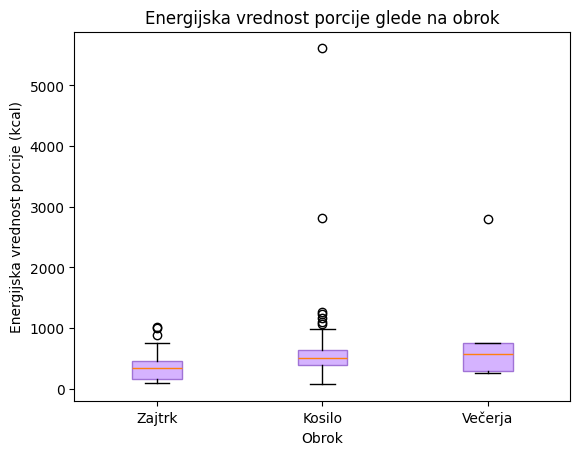

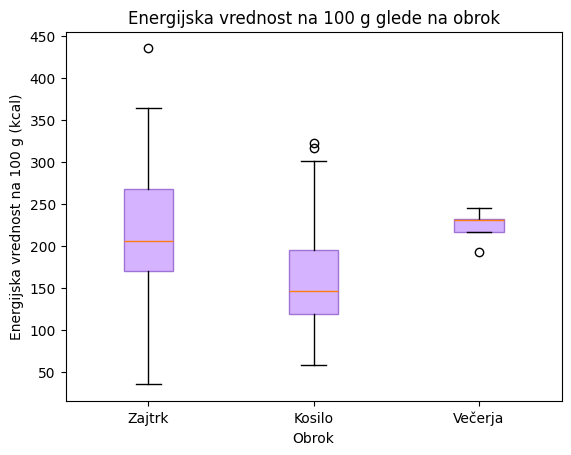

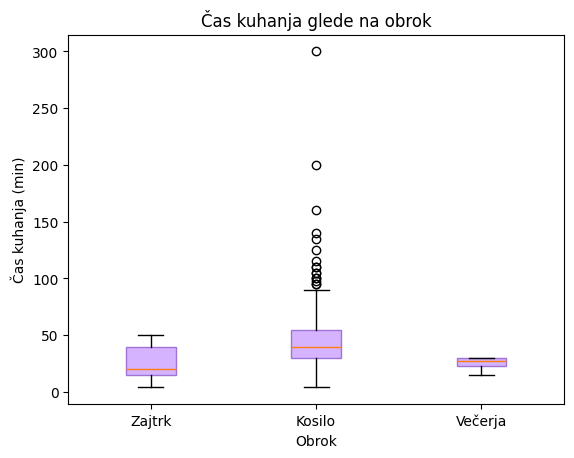

In [253]:
zajtrk = recepti[recepti['oznaka'] == 'Zajtrk']
kosilo = recepti[recepti['oznaka'] == 'Kosilo']
vecerja = recepti[recepti['oznaka'] == 'Večerja']

plt.boxplot([zajtrk['energija_porcija'], kosilo['energija_porcija'], vecerja['energija_porcija']],
            tick_labels=['Zajtrk', 'Kosilo', 'Večerja'], 
            patch_artist=True, boxprops=dict(facecolor='#d5b3ff', color='#a073d6')) 
plt.title('Energijska vrednost porcije glede na obrok')
plt.ylabel('Energijska vrednost porcije (kcal)')
plt.xlabel('Obrok')
plt.show()

plt.boxplot([zajtrk['energija_100g'], kosilo['energija_100g'], vecerja['energija_100g']],
            tick_labels=['Zajtrk', 'Kosilo', 'Večerja'], 
            patch_artist=True, boxprops=dict(facecolor='#d5b3ff', color='#a073d6')) 
plt.title('Energijska vrednost na 100 g glede na obrok')
plt.ylabel('Energijska vrednost na 100 g (kcal)')
plt.xlabel('Obrok')
plt.show()

plt.boxplot([zajtrk['cas_kuhanja'].dropna(), kosilo['cas_kuhanja'].dropna(), vecerja['cas_kuhanja'].dropna()],
            tick_labels=['Zajtrk', 'Kosilo', 'Večerja'], 
            patch_artist=True, boxprops=dict(facecolor='#d5b3ff', color='#a073d6')) 
plt.title('Čas kuhanja glede na obrok')
plt.ylabel('Čas kuhanja (min)')
plt.xlabel('Obrok')
plt.show()

Razpored receptov po kategorijah, kot so 'Vegansko', 'Meso', 'Ribe in morski sadeži' ter podobno, nam omogoča analizo energijske vrednosti porcije teh jedi glede na vsebovanost mesa/rib. Spodnji graf prikazuje, da je vrednost mediane pri vegetarijanskih in veganskih jedeh res nižja kot pri mesnih in morskih jedeh, ki očitno v večini primerov vsebujejo več kalorij. Zanimivo je tudi, da je pri podatkih za mesne jedi največ odstopanj, pri morskih pa najmanj.

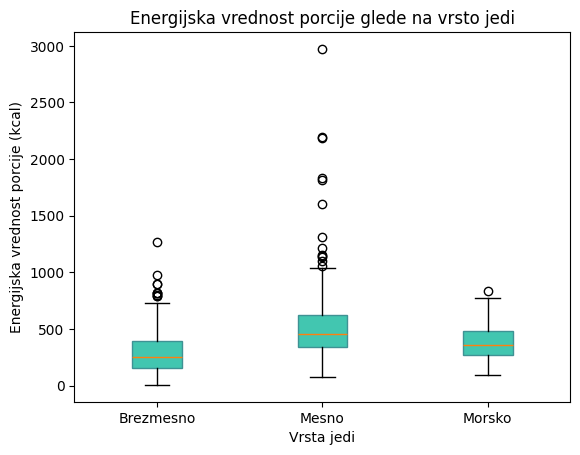

In [254]:
brezmesno = recepti[recepti['oznaka'].isin(['Brez mesa', 'Plant based', 'Veganstvo', 'Vegetarijanstvo', 'Zdravo in vegi'])]
mesno = recepti[recepti['oznaka'] == 'Meso']
morsko = recepti[recepti['oznaka'] == 'Ribe in morski sadeži']

plt.boxplot([brezmesno['energija_porcija'].dropna(), mesno['energija_porcija'].dropna(), morsko['energija_porcija']],
            tick_labels=['Brezmesno', 'Mesno', 'Morsko'],
            patch_artist=True, boxprops=dict(facecolor='#42c6b0', color='#3f9294'))
plt.title('Energijska vrednost porcije glede na vrsto jedi')
plt.ylabel('Energijska vrednost porcije (kcal)')
plt.xlabel('Vrsta jedi')
plt.show()

V naslednjem stolpičnem grafu so prikazani avtorji, ki so napisali vsaj 60 receptov. Zanimivo je, da je en sam avtor (M. J.) napisal kar 2615 receptov, kar je 38.8 % vseh receptov, ki smo jih vključili v analizo.

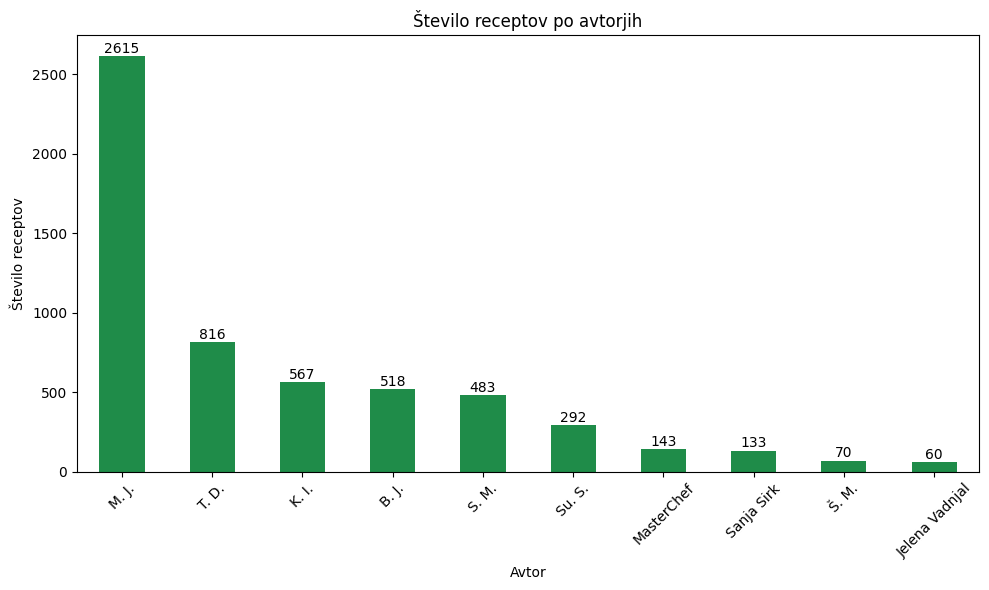

In [245]:
for avtor in recepti['avtor'].unique():
    recepti.groupby('avtor')['ime'].count().sort_values(ascending=False).head(10).plot.bar(figsize=(10, 6), color='#1f8c49')
plt.title('Število receptov po avtorjih')
plt.xlabel('Avtor')
plt.ylabel('Število receptov')
plt.xticks(rotation=45)
plt.tight_layout()
for i in range(len(recepti.groupby('avtor')['ime'].count().sort_values(ascending=False).head(10))):
    plt.text(i, recepti.groupby('avtor')['ime'].count().sort_values(ascending=False).head(10).values[i] + 0.5, 
             str(recepti.groupby('avtor')['ime'].count().sort_values(ascending=False).head(10).values[i]), 
             ha='center', va='bottom')
plt.show()

Naslednji stolpični graf prikazuje število receptov glede na število sestavin, ki jih potrebujemo za pripravo te jedi. Iz grafa lahko razberemo, da je za največ jedi potrebnih 9 sestavin, za zelo majhno število jedi pa bi potrebovali majhno (manj kot 3) ali veliko (več kot 15) število sestavin.

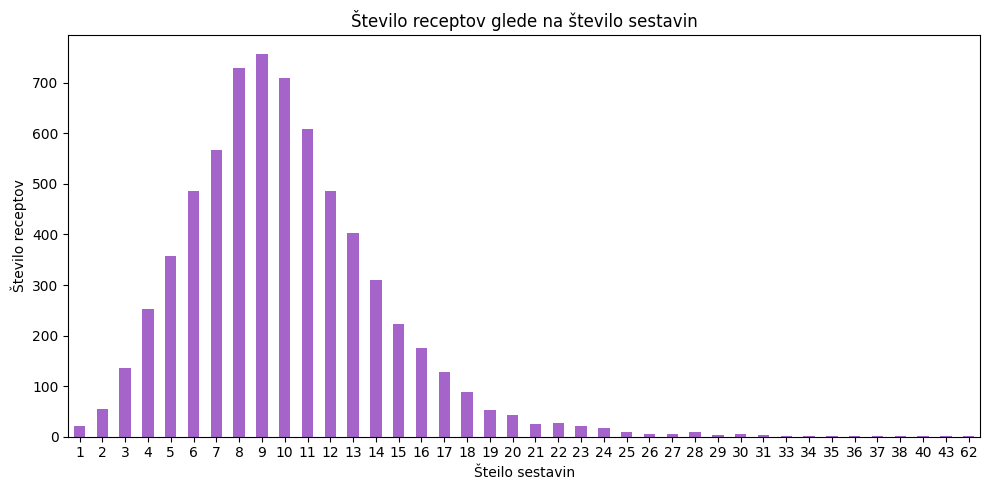

In [246]:
for stevilo in recepti['stevilo_sestavin'].unique():
    recepti.groupby('stevilo_sestavin')['ime'].count().plot.bar(figsize=(10, 5), color='#a564c9')
plt.title('Število receptov glede na število sestavin')
plt.xlabel('Šteilo sestavin')
plt.ylabel('Število receptov')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Da smo lahko analizirali koliko časa vzamejo recepti za pripravo in kuhanje, smo dodali stolpec s podatki o številu ur skupnega časa. Tako 1 pomeni, da za pripravo in kuhanje jedi potrebujemo vsaj eno uro, vendar ne več kot 2.

In [247]:
recepti['skupni_cas_v_urah'] = recepti['skupni_cas'] // 60

Iz stolpičnega grafa lahko razberemo, da za pripravo večine jedi potrebujemo manj kot 1 uro, za vsako nadaljnjo uro pa se število receptov po skupnem času manjša.

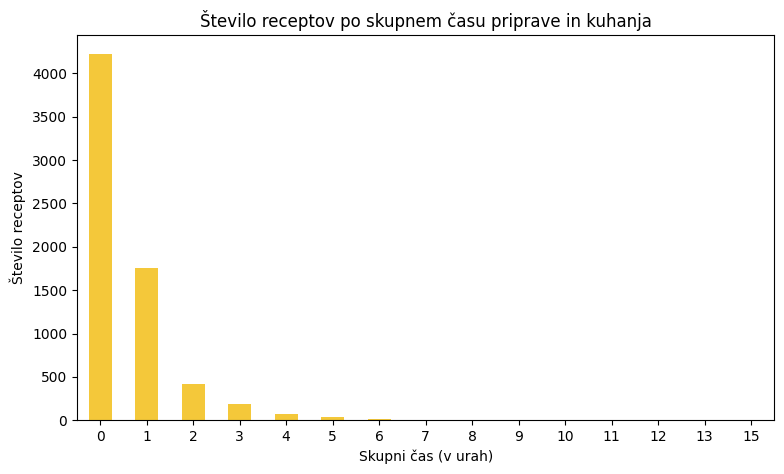

In [248]:
for stevilo in recepti['skupni_cas_v_urah'].unique():
    recepti.groupby('skupni_cas_v_urah')['ime'].count().plot.bar(figsize=(9, 5), color='#f4c83a')
plt.title('Število receptov po skupnem času priprave in kuhanja')
plt.xlabel('Skupni čas (v urah)')
plt.ylabel('Število receptov')
plt.xticks(rotation=0)
plt.show()

Podrobneje si v stolpičnem grafu lahko ogledamo, koliko minut vzamejo recepti, ki imajo skupni čas priprave manjši od 1 ure. Iz grafa je razvidno, da večina avtorjev zaokroži čas priprave na števila, ki so deljiva s 5.

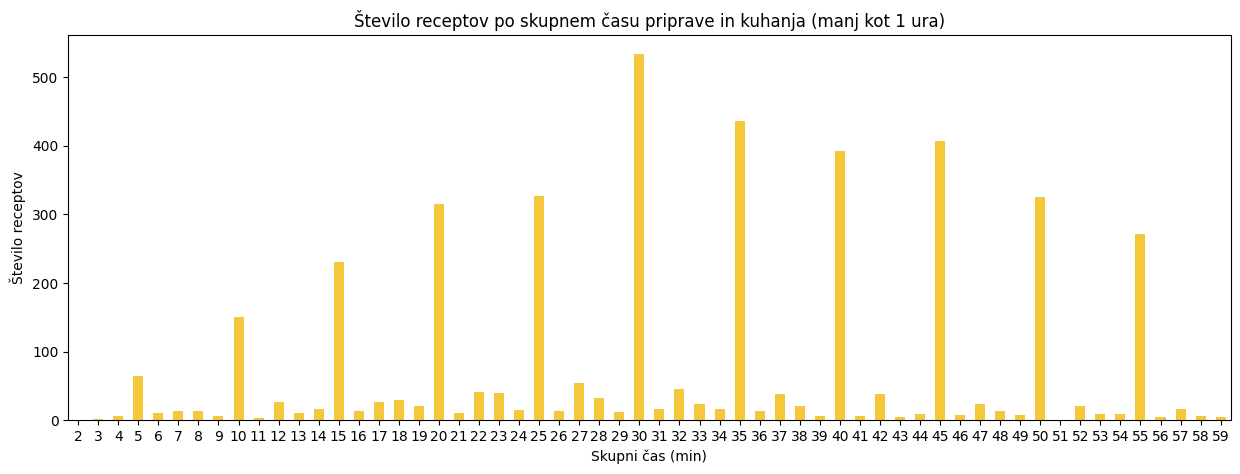

In [249]:
recepti[recepti['skupni_cas_v_urah'] < 1].groupby('skupni_cas')['ime'].count().plot.bar(color='#f4c83a', figsize=(15, 5))
plt.title('Število receptov po skupnem času priprave in kuhanja (manj kot 1 ura)')
plt.xlabel('Skupni čas (min)')
plt.ylabel('Število receptov')
plt.xticks(rotation=0)
plt.show()

Naslednji graf prikazuje skupni čas priprave in kuhanja glede na težavnost receptov. Čeprav pri lahkih in srednje težkih receptih veliko podatkov odstopa, lahko opazimo, da se skupni čas lahkih receptov načeloma manj razlikuje kot pri srednje težkih in težkih receptih. Vrednost mediane pri lahkih receptih je manjša od tiste pri srednje težkih receptih, ta pa je še manjša od tiste pri težkih.

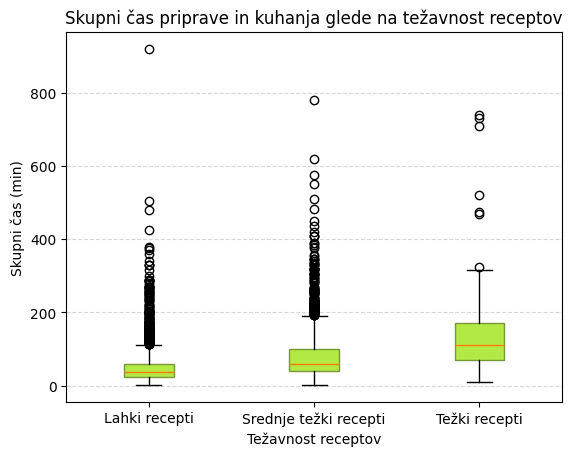

In [255]:
lahki = recepti[recepti['tezavnost'] == 1]
srednje_tezki = recepti[recepti['tezavnost'] == 2]
tezki = recepti[recepti['tezavnost'] == 3]

plt.boxplot([lahki['skupni_cas'].dropna(), srednje_tezki['skupni_cas'].dropna(), tezki['skupni_cas']],
            tick_labels=['Lahki recepti', 'Srednje težki recepti', 'Težki recepti'],
            patch_artist=True, boxprops=dict(facecolor='#b2e944', color='#789837'))
plt.title('Skupni čas priprave in kuhanja glede na težavnost receptov')
plt.xlabel('Težavnost receptov')
plt.ylabel('Skupni čas (min)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Korelacija med dolžino navodil in številom sestavin je prikazana v naslenjem grafu. Čeprav nekaj podatkov konkretno odstopa od črte najboljšega prirejanja, opazimo pozitivno korelacijo med tema dvema spremenljivkama. To je seveda pričakovan rezultat, ker je za recepte z več sestavinami potrebno razložiti, kaj z vsako narediti, da lahko pripravimo določeno jed, za kar pa avtorji uporabijo več besed in posledično ustvarijo daljša navodila.

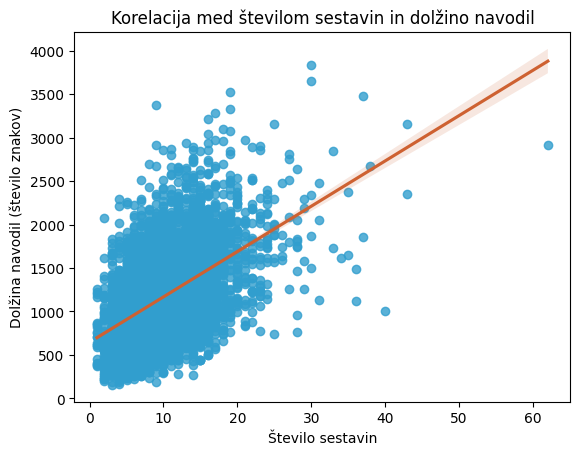

In [251]:
sns.regplot(x=recepti['stevilo_sestavin'], y=recepti['dolzina_navodil'], data=recepti,
            color='#319ece', line_kws={'color': '#ce6131'})
plt.title('Korelacija med številom sestavin in dolžino navodil')
plt.xlabel('Število sestavin')
plt.ylabel('Dolžina navodil (število znakov)')
plt.show()

Odnos med dolžino navodil, določeno s številom znakov, ter skupnim časom kuhanja in priprave jedi je prikazan v naslednjem grafu. Opazimo lahko šibko pozitivno korelacijo, ker v grafu nekaj podatkov odstopa: dolgi recepti, ki ne vzamejo veliko časa, ter krajši recepti, ki imajo velik skupni čas priprave in kuhanja. Kljub temu je opazen pričakovan trend: daljši kot je recept, daljši je tudi skupni čas.

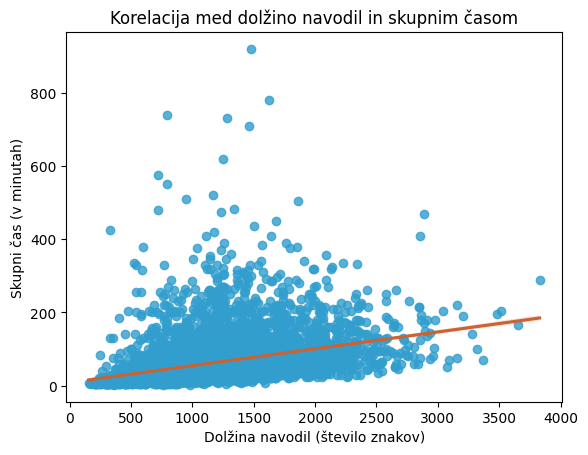

In [252]:
sns.regplot(x=recepti['dolzina_navodil'], y=recepti['skupni_cas'], data=recepti,
            color='#319ece', line_kws={'color': '#ce6131'})
plt.title('Korelacija med dolžino navodil in skupnim časom')
plt.xlabel('Dolžina navodil (število znakov)')
plt.ylabel('Skupni čas (v minutah)')
plt.show()

## Zaključki in nadaljnja analiza
Čeprav je manjše število podatkov (čas priprave, čas kuhanja, energijske vrednosti) manjkalo pri določenih receptih, je velika količina podatkov vseeno zadostovala za osnovno analizo odnosov med njimi. Če bi želeli narediti še bolj poglobljeno analizo, bi lahko analizirali pogostost besed v navodilih ter sestavin med različnimi recepti. Lahko bi zbrali tudi podatke o sestavi prehrane - količini beljakovin, maščob, ogljikovih hidratov, vlaknin ter vitaminov in mineralov. Dodatno bi lahko sestavili funkcije, ki bi omogočale vnos želenih količin hranilnih vrednosti in vrnile seznam receptov, ki zadostujejo tem zahtevam. 